In [1]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


import torchvision
from torchvision import transforms


import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as TF

## Bruit gaussien

In [2]:
class AddGaussianNoise(object):
    def __init__(self, mean=0, std=0.1):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean


In [16]:
data_noisy = torchvision.datasets.ImageFolder("data-20230124T132215Z-001.zip", transform=transforms.Compose([transforms.ToTensor(),AddGaussianNoise()]))

NotADirectoryError: [WinError 267] Nom de répertoire non valide: 'data-20230124T132215Z-001.zip'

## Rotation des images

In [13]:
# rotation de toutes les imagettes
imagettes = []
labels = []

# on veut multiplier le nombre d'imagettes par 4 donc pour chaque imagettes on fait 3 rotations différentes
angles = [90, 180, 270]

for image, label in data_noisy:
    # on effectue des transformations pour avoir des dimensions de type (1 , 3 , 100, 100)
    # car la fonction rotate ci-dessous ne prends que les dimensions 4 ou 5
    im = image/255
    im = im.unsqueeze(0)
    for degre in angles:
        out = TF.rotate(im, degre)
        imagettes.append((out.squeeze().permute(1,2,0))*255)
    imagettes.append((im.squeeze().permute(1,2,0))*255)
    # on récupère les labels
    labels.append(label)


In [14]:
print(len(imagettes))

14400


In [15]:
labels_rot = torch.tensor(labels).repeat(4)
print(len(labels_rot))

14400


## Refaire un dataset avec les nouvelles données

In [7]:
new_labels = torch.tensor(labels_rot)

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_13156\2874500097.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  new_labels = torch.tensor(labels_rot)


In [9]:
tensor_size = imagettes[0].size()

tensor_batch = torch.zeros((len(imagettes), *tensor_size))

for i, tensor in enumerate(imagettes):
    tensor_batch[i] = tensor

In [11]:
new_data = torch.utils.data.TensorDataset(tensor_batch, new_labels)

In [12]:
torch.save(new_data, "new_data.pt")


# Vérification si ça marche

In [3]:
new_data = torch.load("data_original_agmented_001.pt") #données brutes (avec fichier pos et neg seulement)


In [4]:
ims = []
labs = []
for image, label in new_data:
    ims.append(image)
    labs.append(labs)

In [5]:
print(len(ims), len(labs))

14400 14400


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


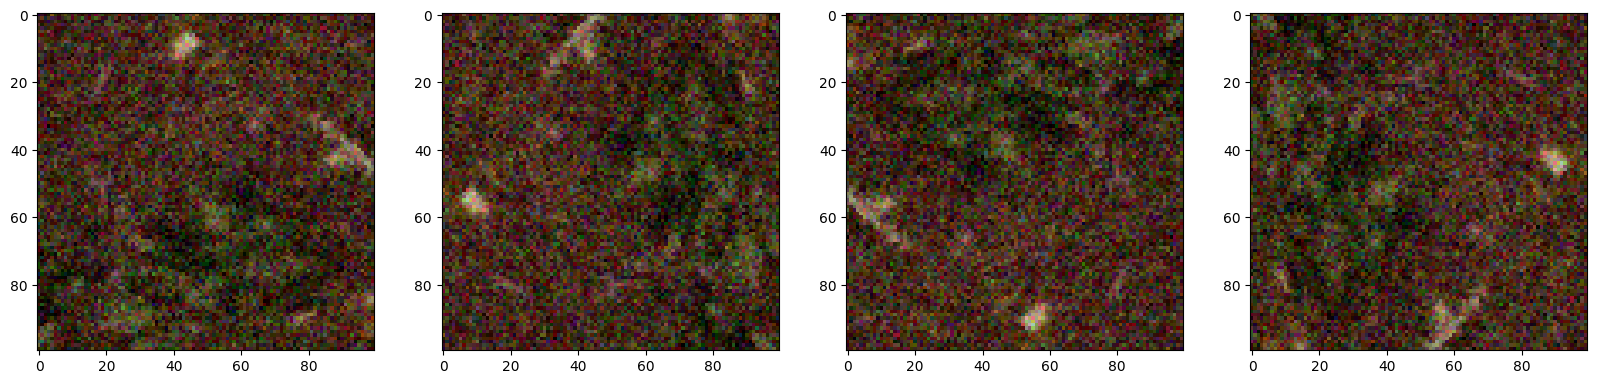

In [7]:
fig, axs = plt.subplots(1, len(ims[0:4]),  figsize=(20,10))

for i, image_tensor in enumerate(ims[0:4]):
    axs[i].imshow(image_tensor)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f211ba4-8439-4b4f-a72d-48759d094385' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>